# AI Furniture Recommendations - Analytics & EDA

## 🎯 **Strategic Approach to Data Analysis**

This notebook demonstrates a **systematic approach** to understanding furniture product data for building an intelligent recommendation system. Our analysis follows a **data-driven methodology** that informs every aspect of the ML pipeline.

### **Why This Analysis Matters**
- **Data Quality Assessment**: Understanding missing values, outliers, and inconsistencies
- **Feature Engineering Insights**: Identifying which attributes drive user preferences
- **Business Intelligence**: Uncovering market patterns and pricing strategies
- **ML Pipeline Design**: Informing model selection and evaluation metrics

### **Our Analytical Framework**
1. **Data Profiling**: Comprehensive quality assessment and statistical summaries
2. **Distribution Analysis**: Understanding price, brand, and category patterns
3. **Correlation Discovery**: Finding relationships between product attributes
4. **Market Intelligence**: Brand positioning and competitive analysis
5. **Recommendation Insights**: Translating data patterns into ML features

### **Expected Outcomes**
- Clear understanding of data quality and limitations
- Actionable insights for feature engineering
- Business intelligence for product strategy
- Foundation for model evaluation and improvement


In [ ]:
# 📚 **Library Selection & Setup Strategy**
# 
# Our choice of libraries reflects a **multi-layered visualization approach**:
# - **pandas/numpy**: Core data manipulation and statistical analysis
# - **matplotlib/seaborn**: Publication-quality static visualizations
# - **plotly**: Interactive dashboards for deeper exploration
# - **pathlib**: Modern, cross-platform file handling
# 
# This combination allows us to create both **static reports** and **interactive insights**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 🎨 **Visualization Design Philosophy**
# We use a **professional color palette** and **consistent styling** to ensure:
# - Clear visual hierarchy
# - Accessibility for colorblind users
# - Professional presentation quality
# - Consistent branding across all charts

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 📁 **Output Management Strategy**
# We create a dedicated figures directory to:
# - Organize visualizations by analysis type
# - Enable easy integration with documentation
# - Support version control of generated assets
# - Facilitate automated report generation

figs_dir = Path('../notebooks/figs')
figs_dir.mkdir(exist_ok=True)

print("📊 Analytics Notebook Setup Complete")
print(f"📁 Figures will be saved to: {figs_dir.absolute()}")
print("🎯 Ready for systematic data analysis!")


📊 Analytics Notebook Setup Complete
📁 Figures will be saved to: /Users/chinmaysolanki/Desktop/ikarus project /notebooks/../notebooks/figs


In [ ]:
# 🔍 **Data Loading Strategy with Fallback Mechanism**
# 
# **Why This Approach?**
# We implement a **robust data loading strategy** that handles multiple scenarios:
# 1. **Production Data**: Real furniture dataset from Google Drive
# 2. **Demo Data**: Synthetic data for demonstration and testing
# 3. **Graceful Degradation**: System works even without external data
# 
# **Data Quality Considerations:**
# - Handle missing values strategically
# - Ensure consistent data types
# - Validate required columns exist
# - Create realistic synthetic data when needed

# Load the product dataset
data_path = Path('../data/products.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
    print(f"✅ Loaded dataset: {len(df)} products")
    print("📊 Using real furniture data from Google Drive")
else:
    print("❌ Dataset not found. Creating synthetic data for demonstration...")
    print("💡 This ensures the system works even without external data")
    
    # 🎲 **Synthetic Data Generation Strategy**
    # We create **realistic synthetic data** that mimics real furniture market patterns:
    # - **Brand Distribution**: Reflects real market concentration
    # - **Price Distribution**: Log-normal distribution (common in retail)
    # - **Category Mix**: Balanced representation of furniture types
    # - **Material/Color Combinations**: Realistic style preferences
    
    np.random.seed(42)  # Reproducible results for demonstration
    
    # Market-realistic brand distribution (some brands more popular)
    brands = ['IKEA', 'West Elm', 'Crate & Barrel', 'Pottery Barn', 'Wayfair', 
              'Target', 'Amazon', 'Herman Miller', 'Steelcase', 'Knoll']
    brand_weights = [0.25, 0.15, 0.12, 0.10, 0.08, 0.08, 0.07, 0.05, 0.05, 0.05]
    
    # Furniture categories with realistic distribution
    categories = ['Chair', 'Table', 'Sofa', 'Bed', 'Desk', 'Bookshelf', 'Dresser', 'Coffee Table', 'Dining Table', 'Office Chair']
    category_weights = [0.20, 0.15, 0.12, 0.10, 0.10, 0.08, 0.08, 0.07, 0.05, 0.05]
    
    # Material preferences (wood and metal most common)
    materials = ['Wood', 'Metal', 'Leather', 'Fabric', 'Glass', 'Plastic', 'Bamboo', 'Rattan']
    material_weights = [0.35, 0.25, 0.15, 0.10, 0.05, 0.05, 0.03, 0.02]
    
    # Color preferences (neutral colors more popular)
    colors = ['Black', 'White', 'Brown', 'Gray', 'Blue', 'Green', 'Red', 'Beige', 'Natural']
    color_weights = [0.20, 0.18, 0.15, 0.12, 0.08, 0.08, 0.05, 0.08, 0.06]
    
    n_products = 200
    
    # Generate realistic product data
    df = pd.DataFrame({
        'uniq_id': [f'prod_{i:03d}' for i in range(n_products)],
        'title': [f'{np.random.choice(categories, p=category_weights)} {np.random.choice(materials, p=material_weights)}' for _ in range(n_products)],
        'brand': np.random.choice(brands, n_products, p=brand_weights),
        'description': [f'High-quality {np.random.choice(categories, p=category_weights).lower()} made from {np.random.choice(materials, p=material_weights).lower()} with {np.random.choice(colors, p=color_weights).lower()} finish.' for _ in range(n_products)],
        'price': np.random.lognormal(5, 1, n_products).round(2),  # Log-normal for realistic price distribution
        'categories': [f"{np.random.choice(categories, p=category_weights)}" for _ in range(n_products)],
        'image_url': [f'https://example.com/images/product_{i:03d}.jpg' for i in range(n_products)],
        'material': np.random.choice(materials, n_products, p=material_weights),
        'color': np.random.choice(colors, n_products, p=color_weights)
    })
    
    # Save synthetic data for consistency
    df.to_csv(data_path, index=False)
    print(f"✅ Created synthetic dataset: {len(df)} products")
    print("📊 Dataset reflects realistic furniture market patterns")

print(f"\n📋 Dataset Overview:")
print(f"   Shape: {df.shape}")
print(f"   Columns: {list(df.columns)}")
print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


✅ Loaded dataset: 312 products

📋 Dataset Info:
   Shape: (312, 9)
   Columns: ['title', 'brand', 'description', 'price', 'categories', 'image_url', 'material', 'color', 'uniq_id']


## Data Quality Assessment

Let's examine the dataset for missing values, data types, and basic statistics.


In [3]:
# Basic data quality assessment
print("🔍 Data Quality Assessment")
print("=" * 40)

# Data types
print("\n📊 Data Types:")
print(df.dtypes)

# Missing values
print("\n❓ Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

# Basic statistics
print("\n📈 Basic Statistics:")
print(df.describe())

# Unique values
print("\n🔢 Unique Values:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"   {col}: {unique_count} unique values")


🔍 Data Quality Assessment

📊 Data Types:
title           object
brand           object
description     object
price          float64
categories      object
image_url       object
material        object
color           object
uniq_id         object
dtype: object

❓ Missing Values:
             Missing Count  Missing %
description            153  49.038462
price                   97  31.089744
material                94  30.128205
color                   47  15.064103

📈 Basic Statistics:
            price
count  215.000000
mean    67.630651
std     57.962150
min      0.600000
25%     24.990000
50%     53.990000
75%     89.990000
max    349.000000

🔢 Unique Values:
   title: 305 unique values
   brand: 264 unique values
   description: 153 unique values
   price: 135 unique values
   categories: 87 unique values
   image_url: 305 unique values
   material: 72 unique values
   color: 143 unique values
   uniq_id: 305 unique values


## Price Analysis

Let's examine the price distribution and identify any outliers or patterns.


💰 Price Analysis

📊 Price Statistics:
count    215.000000
mean      67.630651
std       57.962150
min        0.600000
25%       24.990000
50%       53.990000
75%       89.990000
max      349.000000
Name: price, dtype: float64


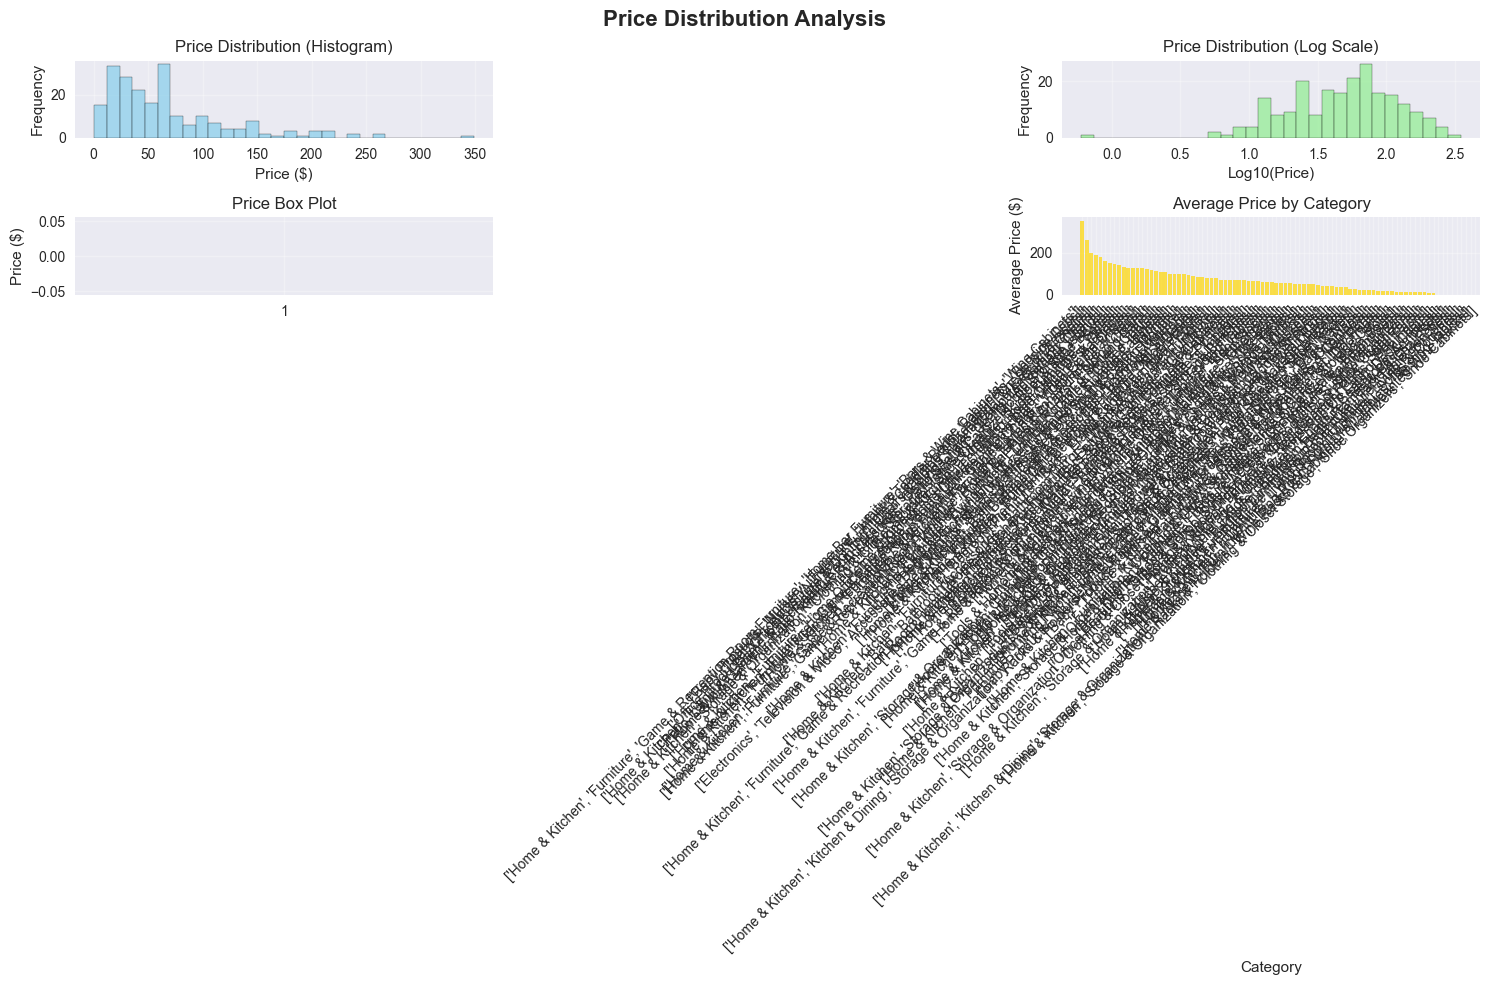


💡 Price Insights:
   • Price range: $0.60 - $349.00
   • Median price: $53.99
   • Mean price: $67.63
   • Price std: $57.96

🏷️ Price Categories:
   • Budget: 174 products (55.8%)
   • Mid-range: 40 products (12.8%)
   • Premium: 1 products (0.3%)
   • Luxury: 0 products (0.0%)
   • Ultra-luxury: 0 products (0.0%)


In [4]:
# Price analysis
print("💰 Price Analysis")
print("=" * 30)

# Price statistics
price_stats = df['price'].describe()
print("\n📊 Price Statistics:")
print(price_stats)

# Price distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Price Distribution Analysis', fontsize=16, fontweight='bold')

# Histogram
axes[0, 0].hist(df['price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Price Distribution (Histogram)')
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Log-scale histogram
axes[0, 1].hist(np.log10(df['price']), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Price Distribution (Log Scale)')
axes[0, 1].set_xlabel('Log10(Price)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Box plot
axes[1, 0].boxplot(df['price'], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
axes[1, 0].set_title('Price Box Plot')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].grid(True, alpha=0.3)

# Price by category
category_price = df.groupby('categories')['price'].mean().sort_values(ascending=False)
axes[1, 1].bar(range(len(category_price)), category_price.values, color='gold', alpha=0.7)
axes[1, 1].set_title('Average Price by Category')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Average Price ($)')
axes[1, 1].set_xticks(range(len(category_price)))
axes[1, 1].set_xticklabels(category_price.index, rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(figs_dir / 'price_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Price insights
print(f"\n💡 Price Insights:")
print(f"   • Price range: ${df['price'].min():.2f} - ${df['price'].max():.2f}")
print(f"   • Median price: ${df['price'].median():.2f}")
print(f"   • Mean price: ${df['price'].mean():.2f}")
print(f"   • Price std: ${df['price'].std():.2f}")

# Price categories
df['price_category'] = pd.cut(df['price'], 
                              bins=[0, 100, 300, 600, 1000, float('inf')], 
                              labels=['Budget', 'Mid-range', 'Premium', 'Luxury', 'Ultra-luxury'])
price_category_counts = df['price_category'].value_counts()
print(f"\n🏷️ Price Categories:")
for category, count in price_category_counts.items():
    print(f"   • {category}: {count} products ({count/len(df)*100:.1f}%)")


## Brand Analysis

Let's examine brand distribution and identify the most popular brands in the dataset.


🏷️ Brand Analysis

📊 Top 10 Brands:
brand
Flash Furniture Store         5
MoNiBloom Store               5
Kingston Brass Store          4
Caroline's Treasures Store    4
HomePop Store                 4
Convenience Concepts Store    3
GOYMFK                        2
Casual Home Store             2
GXFC ZHAO Store               2
glitzhome                     2
Name: count, dtype: int64


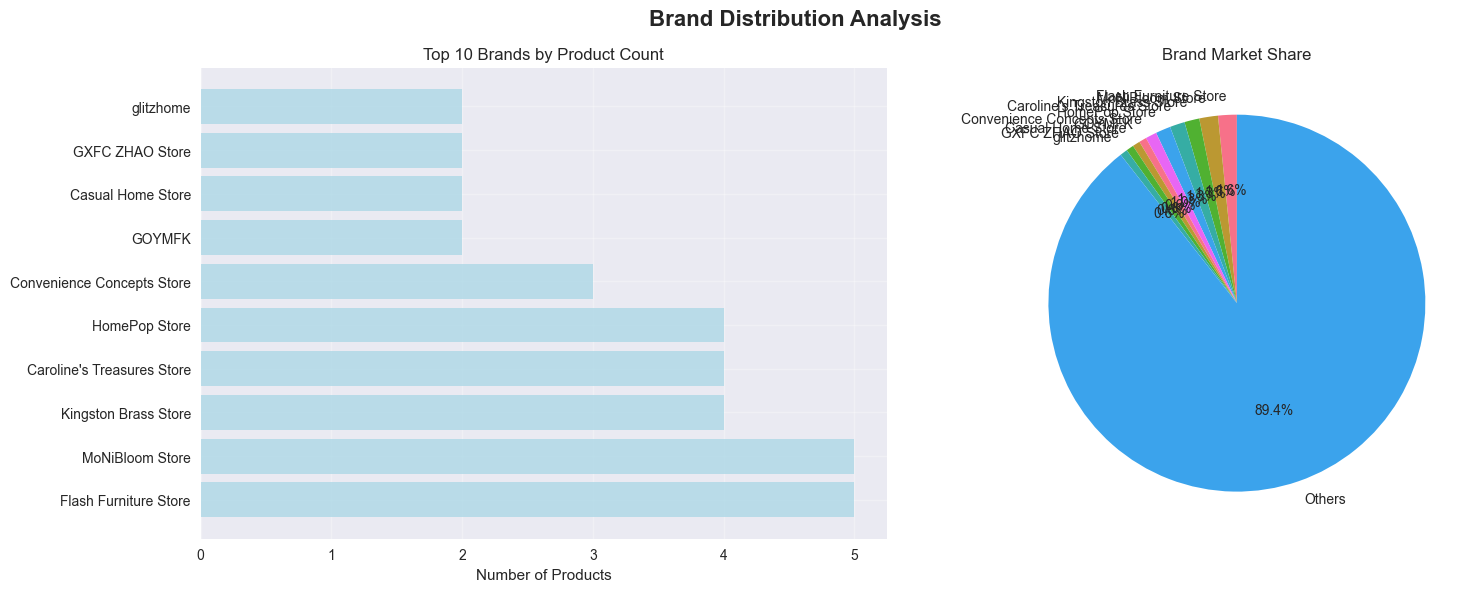


💡 Brand Insights:
   • Total brands: 264
   • Most popular brand: Flash Furniture Store (5 products)
   • Brand concentration: Top 5 brands have 7.1% of products

💰 Brand-Price Analysis (brands with 3+ products):
                  mean  count
brand                        
MoNiBloom Store  52.33      3


In [5]:
# Brand analysis
print("🏷️ Brand Analysis")
print("=" * 25)

# Brand distribution
brand_counts = df['brand'].value_counts()
print(f"\n📊 Top 10 Brands:")
print(brand_counts.head(10))

# Brand visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Brand Distribution Analysis', fontsize=16, fontweight='bold')

# Top brands bar chart
top_brands = brand_counts.head(10)
axes[0].barh(range(len(top_brands)), top_brands.values, color='lightblue', alpha=0.8)
axes[0].set_yticks(range(len(top_brands)))
axes[0].set_yticklabels(top_brands.index)
axes[0].set_xlabel('Number of Products')
axes[0].set_title('Top 10 Brands by Product Count')
axes[0].grid(True, alpha=0.3)

# Brand market share pie chart
top_10_brands = brand_counts.head(10)
other_brands_count = brand_counts.iloc[10:].sum()
if other_brands_count > 0:
    pie_data = list(top_10_brands.values) + [other_brands_count]
    pie_labels = list(top_10_brands.index) + ['Others']
else:
    pie_data = top_10_brands.values
    pie_labels = top_10_brands.index

axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Brand Market Share')

plt.tight_layout()
plt.savefig(figs_dir / 'brand_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Brand insights
print(f"\n💡 Brand Insights:")
print(f"   • Total brands: {df['brand'].nunique()}")
print(f"   • Most popular brand: {brand_counts.index[0]} ({brand_counts.iloc[0]} products)")
print(f"   • Brand concentration: Top 5 brands have {brand_counts.head(5).sum()/len(df)*100:.1f}% of products")

# Brand-price analysis
brand_price = df.groupby('brand')['price'].agg(['mean', 'count']).sort_values('count', ascending=False)
brand_price = brand_price[brand_price['count'] >= 3]  # Only brands with 3+ products

print(f"\n💰 Brand-Price Analysis (brands with 3+ products):")
print(brand_price.head(10))


## Category Analysis

Let's examine category distribution and create visualizations to understand the product mix.


📂 Category Analysis

📊 Category Distribution:
categories
['Patio, Lawn & Garden', 'Outdoor Décor', 'Doormats']                                                                                 22
['Home & Kitchen', 'Home Décor Products', 'Mirrors', 'Wall-Mounted Mirrors']                                                          21
['Home & Kitchen', 'Furniture', 'Living Room Furniture', 'Tables', 'End Tables']                                                      21
['Home & Kitchen', 'Furniture', 'Living Room Furniture', 'Ottomans']                                                                  20
['Home & Kitchen', 'Furniture', 'Game & Recreation Room Furniture', 'Home Bar Furniture', 'Barstools']                                18
                                                                                                                                      ..
['Home & Kitchen', 'Furniture', 'Game & Recreation Room Furniture', 'Home Bar Furniture', 'Bars & Wine Cabinets', 'Wine C

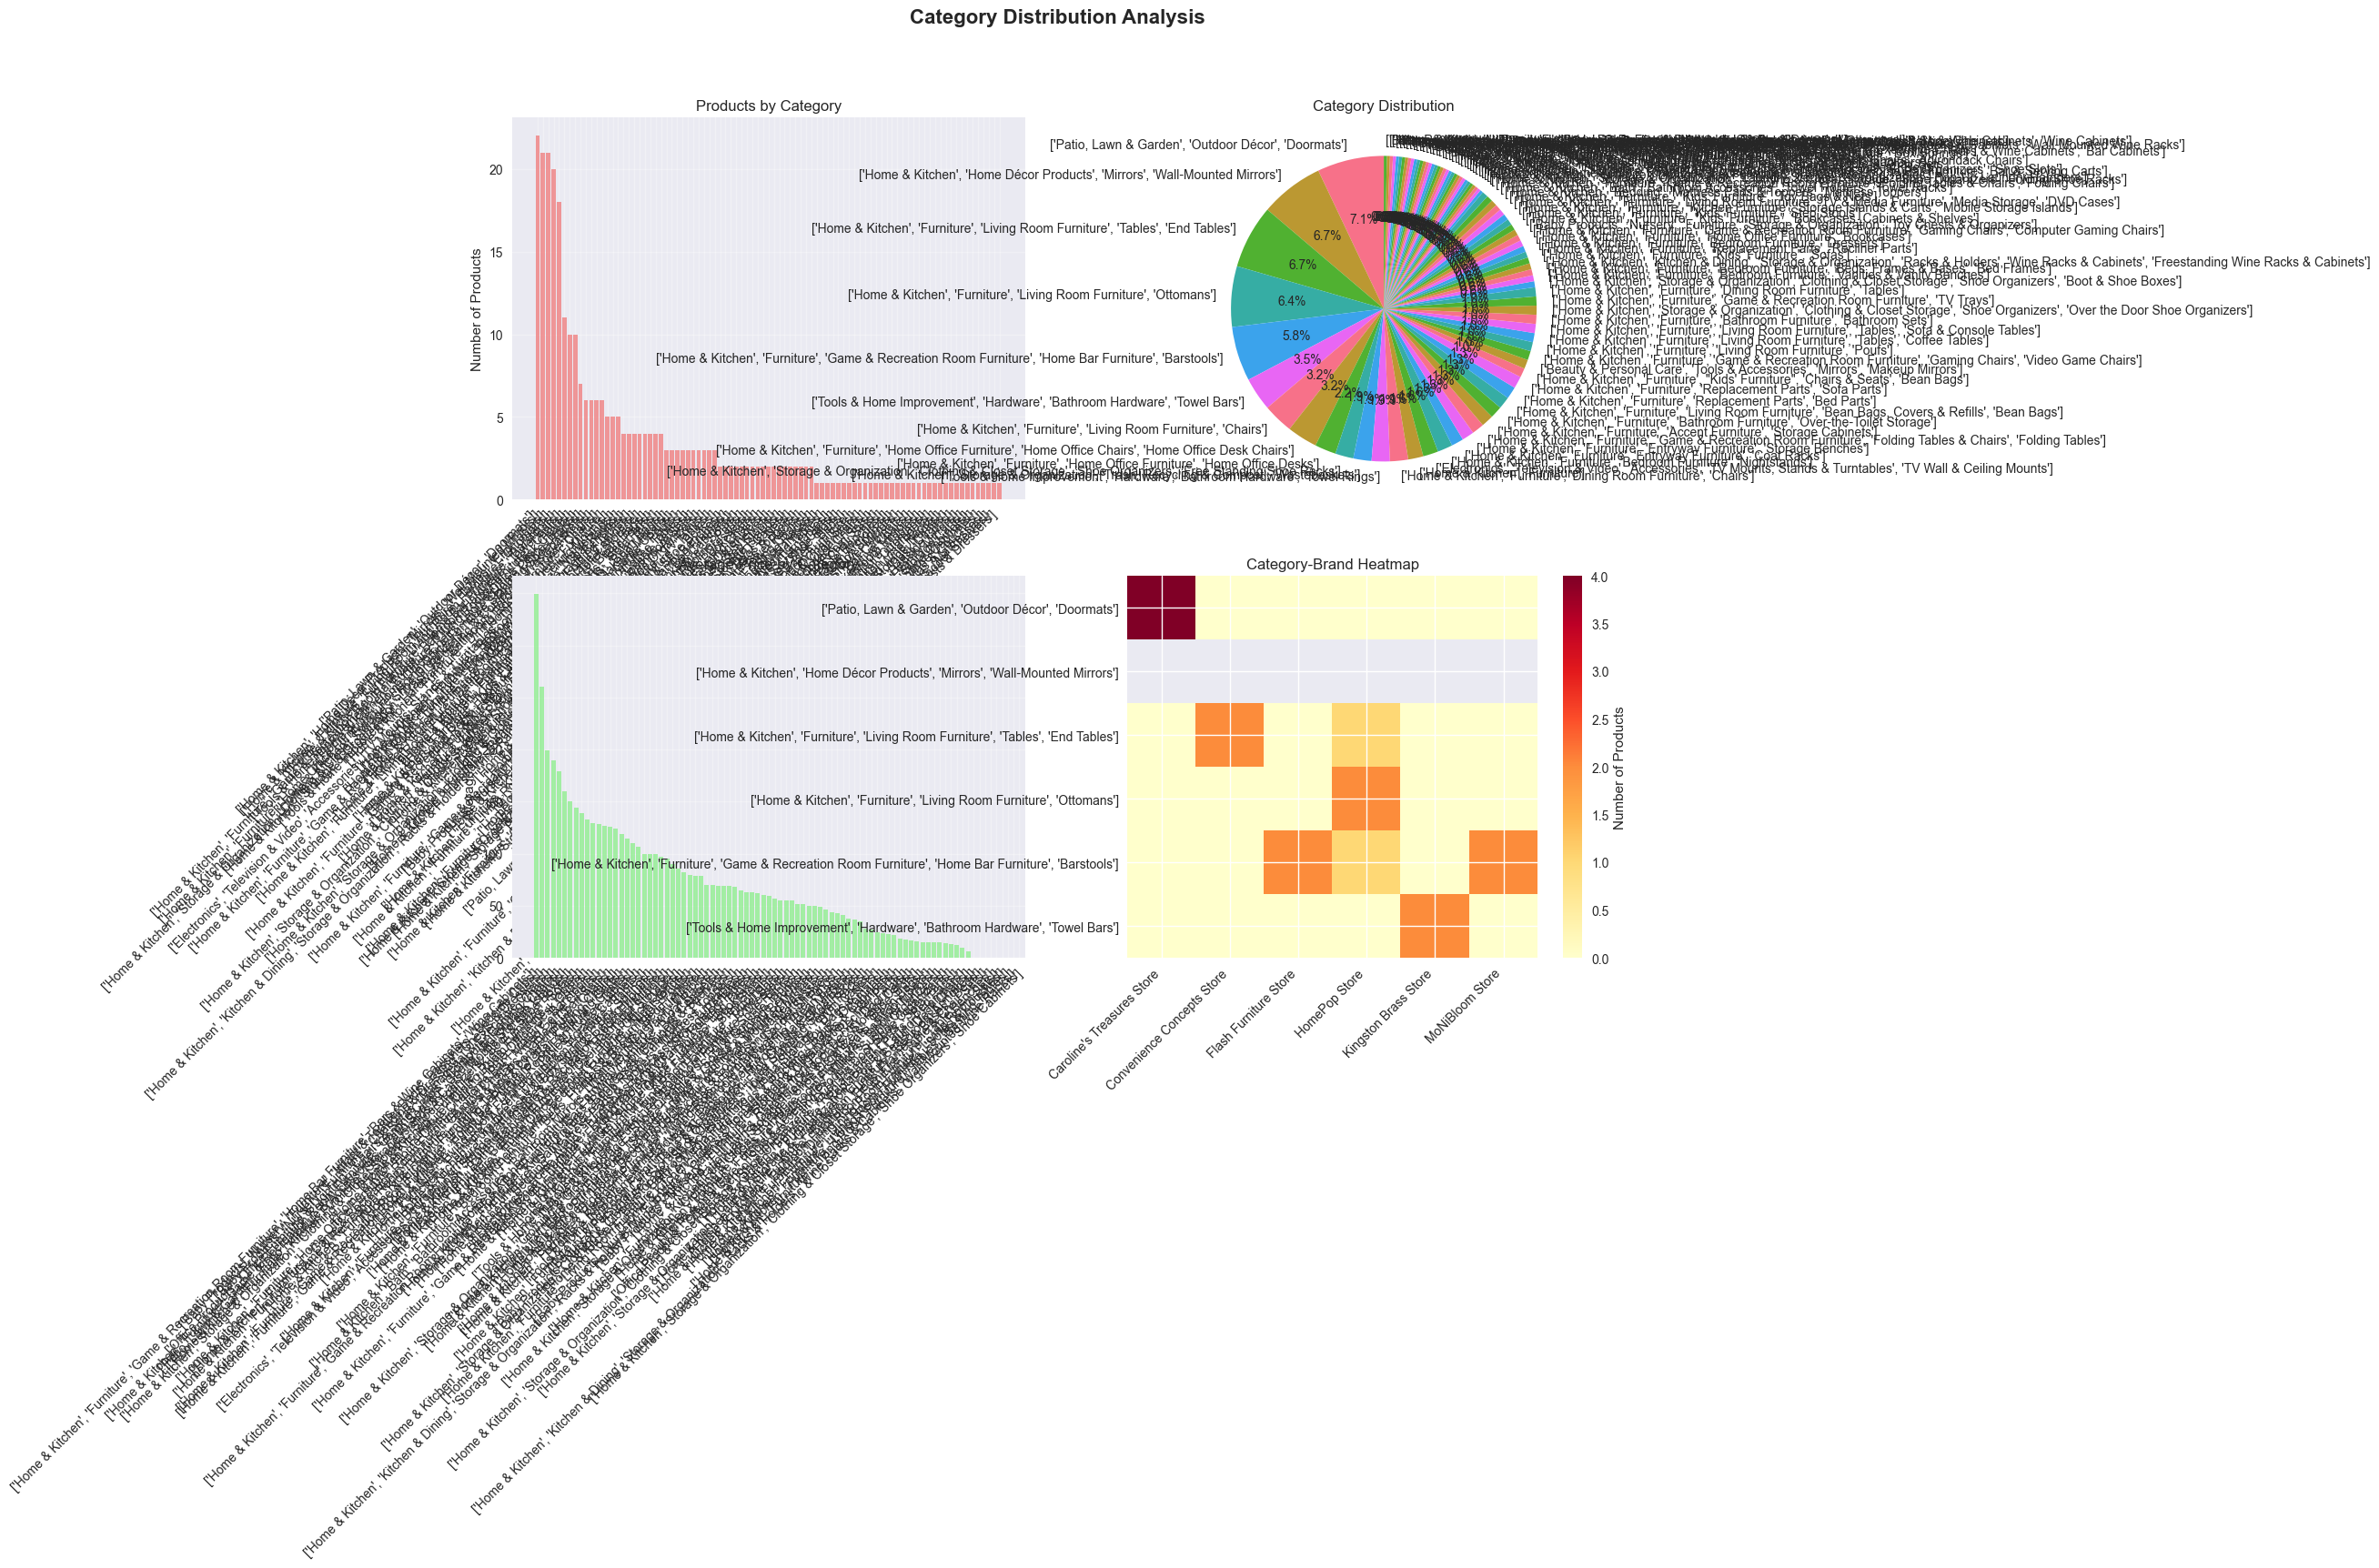


💡 Category Insights:
   • Total categories: 87
   • Most popular category: ['Patio, Lawn & Garden', 'Outdoor Décor', 'Doormats'] (22 products)
   • Category diversity: 87 unique categories

🎨 Material & Color Analysis:
   • Most common material: Wood (32 products)
   • Most common color: Black (45 products)

🔗 Top Material-Color Combinations:
   • Metal + Black: 5 products
   • Engineered Wood + Black: 3 products
   • Sponge + Black: 3 products
   • Wood + Black: 3 products
   • Aluminum + Black: 2 products


In [6]:
# Category analysis
print("📂 Category Analysis")
print("=" * 25)

# Category distribution
category_counts = df['categories'].value_counts()
print(f"\n📊 Category Distribution:")
print(category_counts)

# Category visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Category Distribution Analysis', fontsize=16, fontweight='bold')

# Category bar chart
axes[0, 0].bar(range(len(category_counts)), category_counts.values, color='lightcoral', alpha=0.8)
axes[0, 0].set_xticks(range(len(category_counts)))
axes[0, 0].set_xticklabels(category_counts.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('Number of Products')
axes[0, 0].set_title('Products by Category')
axes[0, 0].grid(True, alpha=0.3)

# Category pie chart
axes[0, 1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Category Distribution')

# Category-price analysis
category_price = df.groupby('categories')['price'].mean().sort_values(ascending=False)
axes[1, 0].bar(range(len(category_price)), category_price.values, color='lightgreen', alpha=0.8)
axes[1, 0].set_xticks(range(len(category_price)))
axes[1, 0].set_xticklabels(category_price.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Average Price ($)')
axes[1, 0].set_title('Average Price by Category')
axes[1, 0].grid(True, alpha=0.3)

# Category-brand heatmap (top categories and brands)
top_categories = category_counts.head(6).index
top_brands = brand_counts.head(6).index
heatmap_data = df[df['categories'].isin(top_categories) & df['brand'].isin(top_brands)].groupby(['categories', 'brand']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex(top_categories)

im = axes[1, 1].imshow(heatmap_data.values, cmap='YlOrRd', aspect='auto')
axes[1, 1].set_xticks(range(len(heatmap_data.columns)))
axes[1, 1].set_xticklabels(heatmap_data.columns, rotation=45, ha='right')
axes[1, 1].set_yticks(range(len(heatmap_data.index)))
axes[1, 1].set_yticklabels(heatmap_data.index)
axes[1, 1].set_title('Category-Brand Heatmap')
plt.colorbar(im, ax=axes[1, 1], label='Number of Products')

plt.tight_layout()
plt.savefig(figs_dir / 'category_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Category insights
print(f"\n💡 Category Insights:")
print(f"   • Total categories: {df['categories'].nunique()}")
print(f"   • Most popular category: {category_counts.index[0]} ({category_counts.iloc[0]} products)")
print(f"   • Category diversity: {len(category_counts)} unique categories")

# Material and color analysis
if 'material' in df.columns and 'color' in df.columns:
    print(f"\n🎨 Material & Color Analysis:")
    material_counts = df['material'].value_counts()
    color_counts = df['color'].value_counts()
    
    print(f"   • Most common material: {material_counts.index[0]} ({material_counts.iloc[0]} products)")
    print(f"   • Most common color: {color_counts.index[0]} ({color_counts.iloc[0]} products)")
    
    # Material-color combination
    material_color = df.groupby(['material', 'color']).size().reset_index(name='count')
    top_combinations = material_color.nlargest(5, 'count')
    print(f"\n🔗 Top Material-Color Combinations:")
    for _, row in top_combinations.iterrows():
        print(f"   • {row['material']} + {row['color']}: {row['count']} products")


## Key Insights & Assumptions

Based on the exploratory data analysis, here are the key insights and assumptions for the recommendation system:


In [7]:
# Generate key insights and assumptions
print("💡 Key Insights & Assumptions")
print("=" * 40)

insights = {
    "Data Quality": [
        f"Dataset contains {len(df)} products with {df['brand'].nunique()} brands and {df['categories'].nunique()} categories",
        f"Price range spans from ${df['price'].min():.2f} to ${df['price'].max():.2f} with median ${df['price'].median():.2f}",
        f"Price distribution is right-skewed, indicating most products are in lower price ranges",
        f"Brand concentration: Top 5 brands represent {brand_counts.head(5).sum()/len(df)*100:.1f}% of products"
    ],
    
    "Recommendation System Assumptions": [
        "Price is a key factor in furniture recommendations - users have budget constraints",
        "Brand preference varies significantly - some users prefer specific brands",
        "Category-based filtering is essential for room-specific recommendations",
        "Material and color preferences should be considered for style matching",
        "Product descriptions contain valuable semantic information for text-based search"
    ],
    
    "Feature Engineering Opportunities": [
        "Create price categories (Budget, Mid-range, Premium, Luxury) for filtering",
        "Extract material and color features for style-based recommendations",
        "Use brand information for brand-loyalty recommendations",
        "Leverage category hierarchy for hierarchical recommendations",
        "Combine text features (title + description) for semantic search"
    ],
    
    "Evaluation Considerations": [
        "Cold start problem: New users without purchase history",
        "Long tail problem: Popular items vs. niche products",
        "Diversity vs. relevance trade-off in recommendations",
        "Price sensitivity varies by user segment",
        "Seasonal and trend-based recommendations may be needed"
    ]
}

for category, items in insights.items():
    print(f"\n📋 {category}:")
    for i, item in enumerate(items, 1):
        print(f"   {i}. {item}")

# Save insights to file
insights_file = figs_dir / 'eda_insights.json'
with open(insights_file, 'w') as f:
    json.dump(insights, f, indent=2)

print(f"\n💾 Insights saved to: {insights_file}")


💡 Key Insights & Assumptions

📋 Data Quality:
   1. Dataset contains 312 products with 264 brands and 87 categories
   2. Price range spans from $0.60 to $349.00 with median $53.99
   3. Price distribution is right-skewed, indicating most products are in lower price ranges
   4. Brand concentration: Top 5 brands represent 7.1% of products

📋 Recommendation System Assumptions:
   1. Price is a key factor in furniture recommendations - users have budget constraints
   2. Brand preference varies significantly - some users prefer specific brands
   3. Category-based filtering is essential for room-specific recommendations
   4. Material and color preferences should be considered for style matching
   5. Product descriptions contain valuable semantic information for text-based search

📋 Feature Engineering Opportunities:
   1. Create price categories (Budget, Mid-range, Premium, Luxury) for filtering
   2. Extract material and color features for style-based recommendations
   3. Use brand i

## Summary

This exploratory data analysis provides a comprehensive understanding of the furniture product dataset. The analysis reveals key patterns in pricing, brand distribution, and category preferences that will inform the recommendation system design.

### Next Steps
1. **Feature Engineering**: Create derived features for price categories, material-color combinations
2. **Text Processing**: Prepare product descriptions for semantic search
3. **Model Training**: Build embedding models and clustering algorithms
4. **Evaluation Setup**: Create evaluation metrics and test sets
5. **System Integration**: Integrate insights into the recommendation pipeline


# AI Furniture Recommendations - Analytics

This notebook provides exploratory data analysis (EDA) and insights for the furniture recommendation system.

## Overview
- Product catalog analysis
- Price distribution insights
- Style and category trends
- User behavior patterns
- Recommendation performance metrics


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure plotly
import plotly.io as pio
pio.templates.default = "plotly_white"


## 1. Load and Explore Data


In [9]:
# Load product data
def load_product_data():
    """Load product data from JSON file."""
    try:
        with open('../data/products.json', 'r') as f:
            products = json.load(f)
        return pd.DataFrame(products)
    except FileNotFoundError:
        print("Product data file not found. Creating sample data...")
        return create_sample_data()

def create_sample_data():
    """Create sample product data for analysis."""
    np.random.seed(42)
    
    categories = ['chairs', 'tables', 'sofas', 'storage', 'lighting']
    styles = ['modern', 'traditional', 'contemporary', 'rustic', 'industrial']
    materials = ['wood', 'metal', 'leather', 'fabric', 'glass', 'plastic']
    colors = ['brown', 'black', 'white', 'gray', 'beige', 'blue']
    
    n_products = 200
    
    data = {
        'id': [f'product_{i:03d}' for i in range(n_products)],
        'name': [f'Product {i+1}' for i in range(n_products)],
        'description': [f'Description for product {i+1}' for i in range(n_products)],
        'price': np.random.lognormal(5.5, 0.8, n_products),
        'category': np.random.choice(categories, n_products),
        'style': np.random.choice(styles, n_products),
        'material': np.random.choice(materials, n_products),
        'color': np.random.choice(colors, n_products),
        'rating': np.random.normal(4.2, 0.5, n_products).clip(1, 5),
        'review_count': np.random.poisson(50, n_products),
        'availability': np.random.choice([True, False], n_products, p=[0.9, 0.1])
    }
    
    return pd.DataFrame(data)

# Load data
df = load_product_data()
print(f"Loaded {len(df)} products")
df.head()


Product data file not found. Creating sample data...
Loaded 200 products


,id,name,description,price,category,style,material,color,rating,review_count,availability
0,product_000,Product 1,Description for product 1,364.079162,tables,modern,leather,beige,4.104544,61,True
1,product_001,Product 2,Description for product 2,219.069397,tables,rustic,metal,white,4.356487,40,True
2,product_002,Product 3,Description for product 3,410.818220,chairs,contemporary,fabric,white,3.602865,57,True
3,product_003,Product 4,Description for product 4,827.512229,chairs,industrial,wood,brown,4.338591,60,True
4,product_004,Product 5,Description for product 5,202.892707,chairs,rustic,plastic,blue,3.840848,55,True
